In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

#torchvision contains a collection of datasets for vision

In [2]:
#Transform - everything we want to apply to the data
#Shuffle - MNIST - hand drawn numbers data set from 0 - 9 28 by 28 image
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw




Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
# Batch - how many at a time do we want to pass to a model
# Nerual network advantage - when we can leverage millions - billions worth of samples
# Neurons per layer - trial and error
# Graident descent operation
# as models start to optimise every weights and bias - if you pass whole data at once,
# the machine may learn some generalisation at once, machine might find that some weights are just arbitrary
# is this generally trough or is it because this is in sample data - machine has no way to know this
# if we pass through batches at a time, each time it optimizes the optimization that stick around generally are going to be the
# general the generalizations the correct things that assumed than just fitment cases - erased out when working in batches
# not the case when you want a bigger batch size - sweet spot batch sizes ~ usually 8 to 64 regardless how big your memory is

#Shuffle - Providing neural network opportunity to learn general principles rather than just simply figuring out tricks
# if there is a quickeer route to get to increasing / decreasing loss - NN is going to take that route

train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [5]:
#showing the data. firstly shown the actual data 28 x 28 and then the result in a batch of 10
for data in train_set:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [8]:
# Data is a tensor object containing list of tensors of images and then list of tensors that are labels
x, y = data[0][0], data[1][0]
# extra 1 in tensor shape
print(x.shape)
print(y)
print(y.shape)

torch.Size([1, 28, 28])
tensor(9)
torch.Size([])


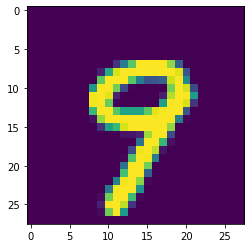

In [9]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

In [10]:
#balancing - if a model can find a shorter path to decrease loss- the optimiser doesn'tknow how good could we get
# just trying to decrease loss the best possible
# what if 60% of our dataset is #3 - our model is quickly learn and adjust weight such that it will always predict a 3
# it is stuck into a hole - getting out means the loss is alot worse than before
# make sure data is as balanced as possible
# attempt: modifying the weights of specific classes when calculating loss
# confirming that the data set is balanced

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in train_set:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001
